## Libraries

In [6]:
!pip install prophet

In [7]:
import numpy as np
import pandas as pd
import pickle
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from prophet import Prophet

## Read Data

In [8]:
filename = "../../data/data.csv"

In [9]:
df = pd.read_csv(filename)

In [10]:
df.count()

datetime       9041
consumption    9041
dtype: int64

In [11]:
df.head()

,datetime,consumption
0,"12/19/2018, 3:00:02 PM",249.0
1,"12/19/2018, 4:00:03 PM",294.0
2,"12/19/2018, 6:00:02 PM",287.0
3,"12/19/2018, 7:00:02 PM",285.0
4,"12/19/2018, 8:00:02 PM",228.0


### Convert index to datetime

In [12]:
df = pd.read_csv(filename,index_col = 'datetime',parse_dates=['datetime'])
df.head(5)

C:\Users\pc\AppData\Local\Temp\ipykernel_11668\1436439848.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(filename,index_col = 'datetime',parse_dates=['datetime'])


,consumption
datetime,
2018-12-19 15:00:02,249.0
2018-12-19 16:00:03,294.0
2018-12-19 18:00:02,287.0
2018-12-19 19:00:02,285.0
2018-12-19 20:00:02,228.0


### Verify that no value is null

In [13]:
df.isna().sum()

consumption    0
dtype: int64

In [14]:
df['consumption'] = df['consumption'] + 1

In [15]:
min(df.consumption)

1.0

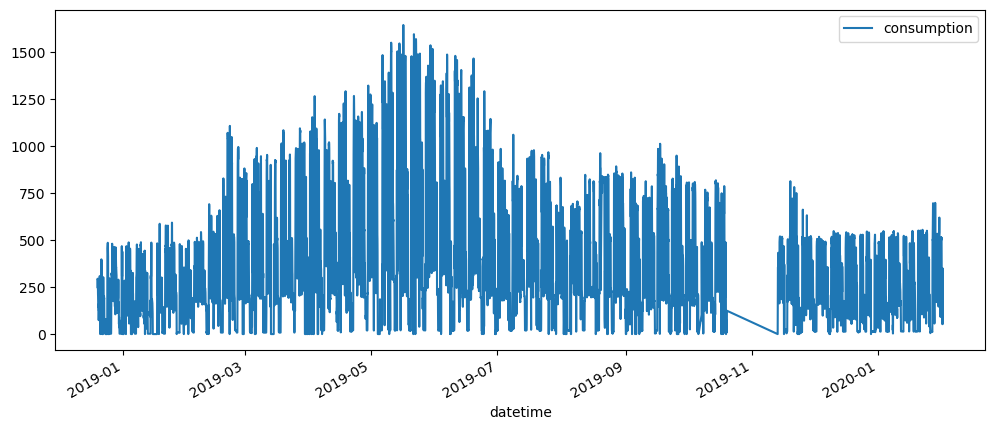

In [16]:
df.plot(figsize=(12,5),legend=True)
plt.show()

## Maximum Energy Consumption Values

In [17]:
df.nlargest(10,'consumption')

,consumption
datetime,
2019-05-16 12:00:02,1643.0
2019-05-16 11:00:01,1620.0
2019-05-21 15:00:02,1594.0
2019-05-21 16:00:02,1583.0
2019-05-22 14:00:02,1568.0
2019-05-22 15:00:02,1568.0
2019-05-22 12:00:01,1554.0
2019-05-22 13:00:02,1551.0
2019-05-10 15:00:02,1549.0


In [18]:
df = df.reset_index()

In [19]:
df.count()

datetime       9041
consumption    9041
dtype: int64

## Changing dataframe format specific to Prophet Model

In [20]:
df = df.rename(columns={'datetime':'ds','consumption':'y'})

In [21]:
df.count()

ds    9041
y     9041
dtype: int64

In [22]:
df.nlargest(10,'y')

,ds,y
3502,2019-05-16 12:00:02,1643.0
3501,2019-05-16 11:00:01,1620.0
3625,2019-05-21 15:00:02,1594.0
3626,2019-05-21 16:00:02,1583.0
3648,2019-05-22 14:00:02,1568.0
3649,2019-05-22 15:00:02,1568.0
3646,2019-05-22 12:00:01,1554.0
3647,2019-05-22 13:00:02,1551.0
3361,2019-05-10 15:00:02,1549.0
3650,2019-05-22 16:00:01,1548.0


In [23]:
df.y = np.log(df.y)

## Model Fitting

In [24]:
model = Prophet()

In [25]:
model.fit(df)

12:02:23 - cmdstanpy - INFO - Chain [1] start processing
12:02:25 - cmdstanpy - INFO - Chain [1] done processing


## Predictions

In [26]:
prediction=model.predict(df)

In [27]:
org_prediction = prediction.copy()

In [28]:
prediction.nlargest(10,'yhat')

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3788,2019-05-28 10:00:02,5.807248,5.610537,8.786444,5.807248,5.807248,1.480249,1.480249,1.480249,0.668502,0.668502,0.668502,0.811746,0.811746,0.811746,0.0,0.0,0.0,7.287497
3789,2019-05-28 11:00:01,5.807050,5.730693,8.956532,5.807050,5.807050,1.477432,1.477432,1.477432,0.696313,0.696313,0.696313,0.781119,0.781119,0.781119,0.0,0.0,0.0,7.284483
3620,2019-05-21 10:00:02,5.802554,5.611941,8.843255,5.802554,5.802554,1.480249,1.480249,1.480249,0.668502,0.668502,0.668502,0.811746,0.811746,0.811746,0.0,0.0,0.0,7.282802
3621,2019-05-21 11:00:02,5.802627,5.706794,8.895929,5.802627,5.802627,1.477407,1.477407,1.477407,0.696297,0.696297,0.696297,0.781110,0.781110,0.781110,0.0,0.0,0.0,7.280033
3452,2019-05-14 10:00:02,5.786815,5.624802,8.962498,5.786815,5.786815,1.480249,1.480249,1.480249,0.668502,0.668502,0.668502,0.811746,0.811746,0.811746,0.0,0.0,0.0,7.267064
3453,2019-05-14 11:00:02,5.787071,5.748473,8.864823,5.787071,5.787071,1.477407,1.477407,1.477407,0.696297,0.696297,0.696297,0.781110,0.781110,0.781110,0.0,0.0,0.0,7.264477
3956,2019-06-04 10:00:02,5.774055,5.577955,8.782900,5.774055,5.774055,1.480249,1.480249,1.480249,0.668502,0.668502,0.668502,0.811746,0.811746,0.811746,0.0,0.0,0.0,7.254304
3957,2019-06-04 11:00:03,5.773858,5.727787,8.777280,5.773858,5.773858,1.477381,1.477381,1.477381,0.696280,0.696280,0.696280,0.781101,0.781101,0.781101,0.0,0.0,0.0,7.251239
3292,2019-05-07 10:00:02,5.743890,5.553661,8.858286,5.743890,5.743890,1.480249,1.480249,1.480249,0.668502,0.668502,0.668502,0.811746,0.811746,0.811746,0.0,0.0,0.0,7.224138
3293,2019-05-07 11:00:02,5.744145,5.565114,8.771167,5.744145,5.744145,1.477407,1.477407,1.477407,0.696297,0.696297,0.696297,0.781110,0.781110,0.781110,0.0,0.0,0.0,7.221552


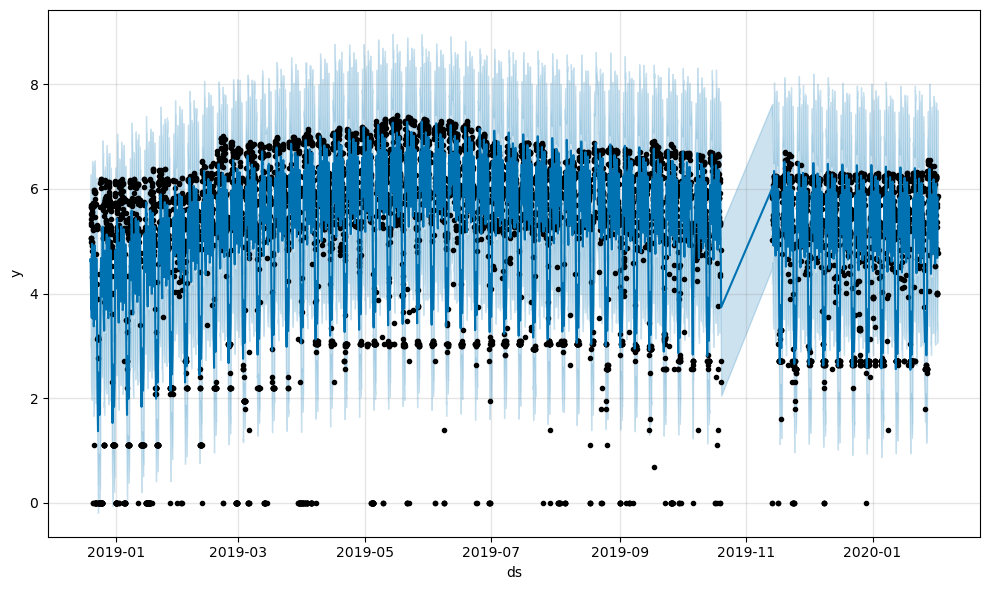

In [29]:
fig = model.plot(prediction)

## Monthly, Daywise and Timewise distribution

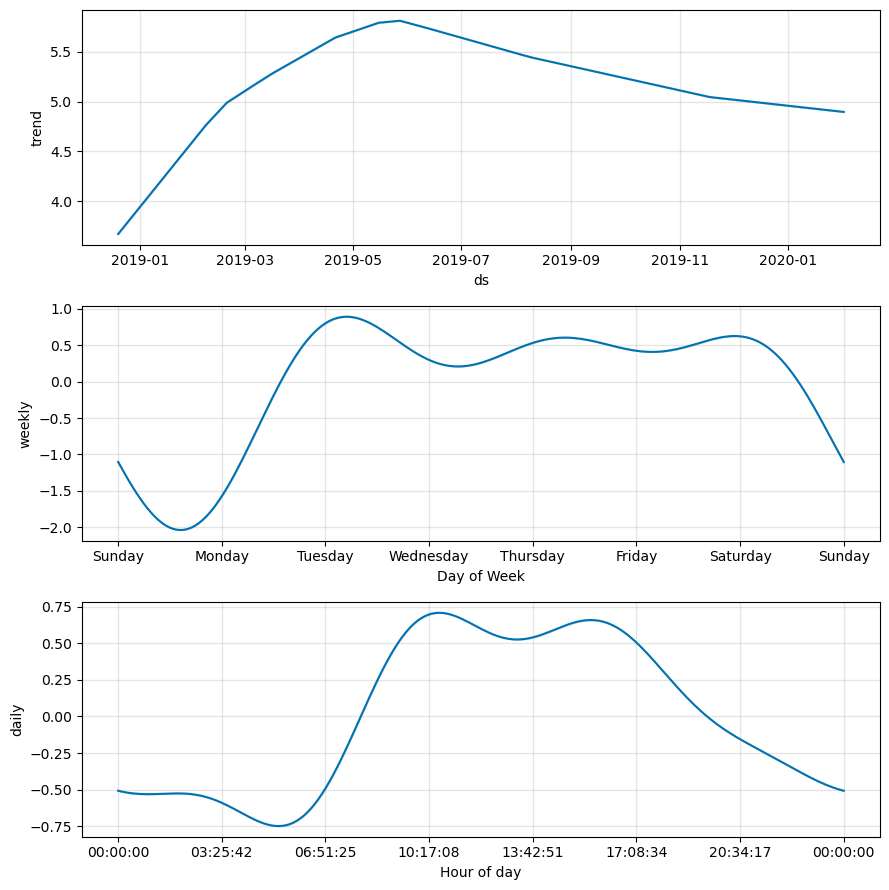

In [30]:
fig = model.plot_components(prediction)

In [31]:
df.head()

,ds,y
0,2018-12-19 15:00:02,5.521461
1,2018-12-19 16:00:03,5.686975
2,2018-12-19 18:00:02,5.662960
3,2018-12-19 19:00:02,5.655992
4,2018-12-19 20:00:02,5.433722


In [32]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-12-19 15:00:02,3.669472,2.997244,6.248734,3.669472,3.669472,0.956740,0.956740,0.956740,0.636529,0.636529,0.636529,0.320211,0.320211,0.320211,0.0,0.0,0.0,4.626212
1,2018-12-19 16:00:03,3.670396,3.140280,6.280131,3.670396,3.670396,0.993783,0.993783,0.993783,0.649815,0.649815,0.649815,0.343968,0.343968,0.343968,0.0,0.0,0.0,4.664179
2,2018-12-19 18:00:02,3.672243,2.822428,5.868672,3.672243,3.672243,0.708886,0.708886,0.708886,0.315231,0.315231,0.315231,0.393656,0.393656,0.393656,0.0,0.0,0.0,4.381129
3,2018-12-19 19:00:02,3.673167,2.755377,5.811371,3.673167,3.673167,0.509012,0.509012,0.509012,0.090246,0.090246,0.090246,0.418766,0.418766,0.418766,0.0,0.0,0.0,4.182179
4,2018-12-19 20:00:02,3.674090,2.424658,5.587032,3.674090,3.674090,0.362152,0.362152,0.362152,-0.081359,-0.081359,-0.081359,0.443512,0.443512,0.443512,0.0,0.0,0.0,4.036243


## Errors

In [33]:
true_val = np.exp(df.y)

In [34]:
pred_val = np.exp(org_prediction['yhat'])

In [35]:
mean_squared_error(y_true=true_val,y_pred=pred_val)

41476.01560932356

In [36]:
mean_absolute_error(y_true=true_val,y_pred=pred_val)

139.26300067132226

## Prediction

In [42]:
data = ['2023-02-25 15:00:00']
test = pd.DataFrame(data, columns = ['ds'])

In [43]:
test.ds

0    2023-02-25 15:00:00
Name: ds, dtype: object

In [44]:
val = model.predict(test)

In [47]:
val

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-02-25 15:00:00,2.67681,1.705874,4.812358,2.67681,2.67681,0.496079,0.496079,0.496079,0.636493,0.636493,0.636493,-0.140415,-0.140415,-0.140415,0.0,0.0,0.0,3.172889


In [49]:
np.exp(val['yhat'])

0    23.876359
Name: yhat, dtype: float64

## Saving Model

In [50]:
type(model)

prophet.forecaster.Prophet

In [51]:
pkl_path = "model.pkl"

In [52]:
model.stan_backend.logger = None

In [53]:
with open(pkl_path, 'wb') as fout:
    pickle.dump(model, fout)

In [54]:
with open('model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)